## Step 2: Time Series Explorator Data Analysis
#### Get a feel for how time series data looks like for various features

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("../data/device_failure.csv")
df.columns = ['date', 'device', 'failure', 'a1', 'a2','a3','a4','a5','a6','a7','a8','a9']
fcols = ['a1', 'a2','a3','a4','a5','a6','a7','a8','a9']
df.loc[:,'date'] = pd.to_datetime(df['date'])

#### Ideally, would save this off in seperate data stores for faster retrieval
##### Like in orc/parquet format (hdfs) to retain format types (especially dates), float/int stored very efficiently

In [4]:
failed_devs = pd.DataFrame(df[df['failure'] == 1].device.unique())
failed_devs.columns = ["device"]
failed_devs_hist = pd.merge(df, failed_devs, on=["device"])

good_devs = pd.DataFrame(list(set(df.device.unique()) - set(failed_devs["device"])))
good_devs.columns = ["device"]
good_devs_hist = pd.merge(df, good_devs, on=["device"])

## Explore how good vs bad devices data looks for various features
#### Just priliminary analysis. See which transformations make sense so we can build modules.

In [5]:
def plot_history(tdf, feature, devname):
    fdev = tdf[tdf["device"] == devname]
    fdev.set_index("date", inplace=True)
    fdev[feature].plot()

def plot_sample_history(tdf, dev_list_df, sample_cnt, feature):
    #Get a sample of devices and their history
    sample_dev_df = dev_list_df.sample(sample_cnt)
    sample_dev_hist = pd.merge(tdf, sample_dev_df, on=["device"])
    for device in sample_dev_df["device"]:
        fig, axs = plt.subplots(1)
        fig.set_size_inches(6,2)
        plot_history(sample_dev_hist, feature, device)

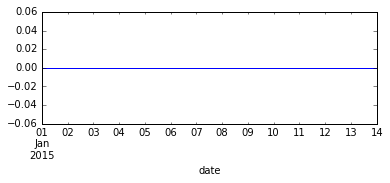

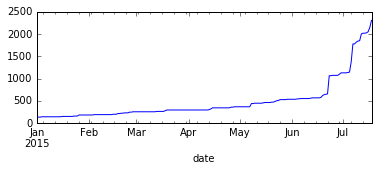

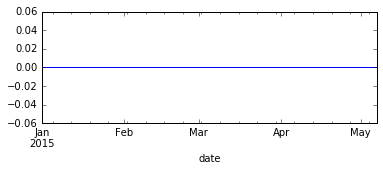

In [6]:
plot_sample_history(failed_devs_hist, failed_devs, 3, "a2")

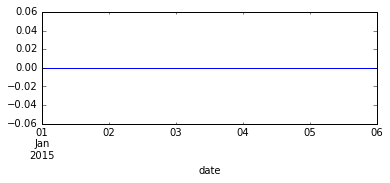

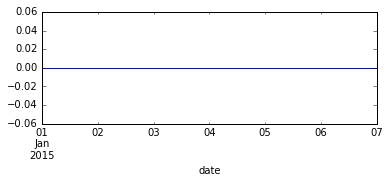

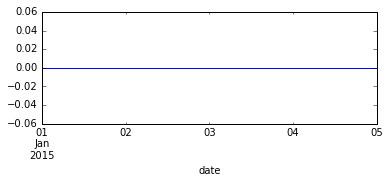

In [7]:
plot_sample_history(good_devs_hist, good_devs, 3, "a2")

### As Good Vs Bad analysys for "a2" shows
##### Failures happen quickly within days, once we start seeing signal on a2
##### Most of good devices don't show any signal activity in a2
##### Range of values varies widely. So, may have to use natural logs, their differentials and derive features from these
##### Note: I have taken samples in 10 many times to come to this conclusion (not just for a2, but all features)

### a1: Cannot seem to find anything different between good and bad devices.
#### Try other approach like using slope and bias of regression lines as features. TBD later

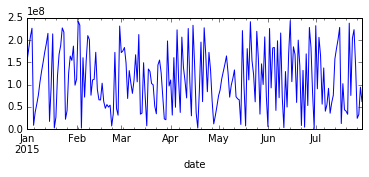

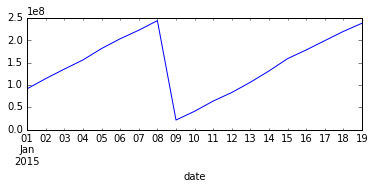

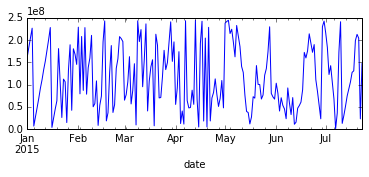

In [8]:
plot_sample_history(failed_devs_hist, failed_devs, 3, "a1")

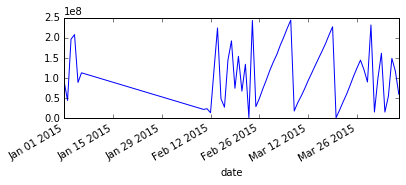

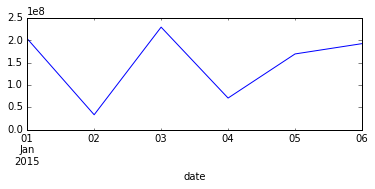

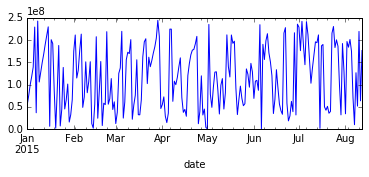

In [9]:
plot_sample_history(good_devs_hist, good_devs, 3, "a1")

## a7 and a8 are the same feature!

In [10]:
df[df["a7"] != df["a8"]]

,date,device,failure,a1,a2,a3,a4,a5,a6,a7,a8,a9


### Summary after going through each feature
#### a2, a7 and a4 show promising difference between good vs bad like shown above. Focus first
#### a5: Don't see much signal here. But confirm.
#### a6: This looks like a counter that just keeps going up. Not expecting much, but confirm
#### a1: May have to try different approach. Good vs bad show no difference with current features
#### a8: same as a7. Ignore